# Assignment 4

## Objective of this assignment
The objective of this exercise is to understand how the unsupervised learning methods $k$-means clustering and hierarchical clustering work. Upon completing the exercise you should also understand how the choice of number of clusters, distance metrics and linkage functions can impact the solutions obtained and further be able to interpret dendrograms and measures of cluster validity

## ** Important: ** When handing in your homework:
+ Hand in the notebook **(and nothing else)** named as follows: **StudentName1_snumber_StudentName2_snumber.ipynb**
+ Provide clear and complete answers to the questions below under a separate header (not hidden somewhere in your source code), and make sure to explain your answers / motivate your choices. Add Markdown cells where necessary.
+ Source code, output graphs, derivations, etc., should be included in the notebook.
+ Hand-in: upload to Brightspace.
+ Include name, student number, assignment (especially in filenames)!
+ When working in pairs only one of you should upload the assignment, and report the name of your partner in your filename.
+ Use the Brightspace discussion board or email the student assistants for questions on how to complete the exercises.
+ If you find mistakes/have suggestions/would like to complain about the assigment material itself, please email me [Lisa] at `l.tostrams@science.ru.nl`


## Advised Reading and Exercise Material
**The following reading material is recommended:**

- Pang-Ning Tan, Michael Steinbach, and Vipin Kumar, *Introduction to Data Mining*, section 8.1-8.3 and 8.5.7


## Additional Tools
For this exercise you will need to load the provided *clusterPlot.py* and *clusterVal.py* scripts. 


## Introduction
In previous exercises we considered supervised learning, i.e., we were given both input data **X** and output values **Y**. We now move on to unsupervised learning where we are only provided input data **X**. The aim is here to find common patterns in the data such as groups of observations that are similar in some sense. In this exercise we will consider two clustering approaches for unsupervised learning: *k*-means clustering and hierarchical clustering.


## 4.1 *k*-means clustering
In this part of the exercise we will investigate *k*-means clustering. In *k*-means each of the data points are assigned to the cluster in closest proximity according to some measure of distance between cluster centers and data points. When the distance is given by the squared euclidian distance, the centers are also called centroids. Once the data points have been assigned, each cluster center is updated to be placed at the center of the data points that are assigned to the cluster. This continues iteratively, usually until the assignment of data points to centers no longer changes or until a maximal number of iterations is reached.

> 4.1.1a (1 point) Load the `synth1` data into python using the `loadmat` function. Cluster the data into *K = 4* clusters using the *k*-means algorithm. Make a scatter plot of the data and the clustering using the provided `clusterPlot()` function. **Don't forget to add axis labels and titles.**
 + *In Python, you can use the function `KMeans()` from the package `sklearn.cluster` to compute *k*-means clustering. please read the documentation of the function, as it creates an object which you can then use for clustering.*
 + *Type `clusterPlot(X,clusters,centroids,y)` to plot the data and the clustering. Don't forget to import the function from the Toolbox folder. If you are unsure about how to use the function, open the .py file in a text editor and take a look at documentation.*


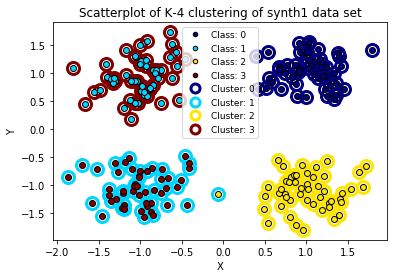

Figure x: Scatterplot of K-4 clustering of synth1 data set visualizing 4 clusters


In [2]:
## Answer to question 4.1.1a
%matplotlib inline

from scipy.io import loadmat
from sklearn.cluster import KMeans
from Toolbox.clusterPlot import clusterPlot
import matplotlib.pyplot as plt 

# Load synth1 data set and compute 4 clusters
synth1_data = loadmat("Data/synth1.mat")
kmeans = KMeans(n_clusters=4).fit(synth1_data['X'])

plt.title("Scatterplot of K-4 clustering of synth1 data set")
plt.xlabel("X")
plt.ylabel("Y")
clusterPlot(synth1_data['X'],kmeans.labels_, y=synth1_data['y'])
plt.show()

print("Figure {}: Scatterplot of K-4 clustering of synth1 data set visualizing 4 clusters".format("x"))

> 4.1.1b (1 point) Try also to cluster and plot the data sets *synth2*, *synth3*, and *synth4* with the same number of *K*. Does the clustering coincide with the true classes? Explain for every data set (including the first one). 

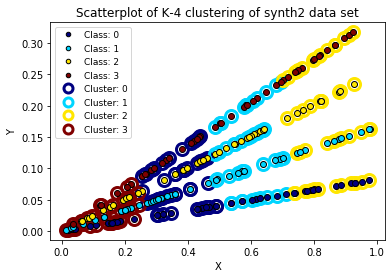

Figure x: Scatterplot of K-4 clustering of synth2 data set visualizing 4 clusters


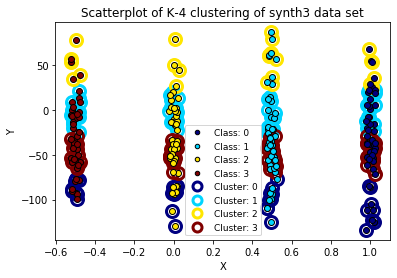

Figure x: Scatterplot of K-4 clustering of synth3 data set visualizing 4 clusters


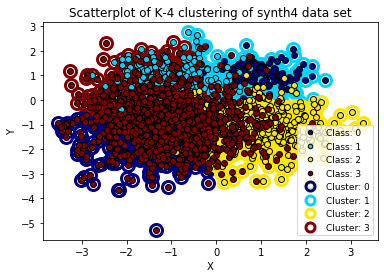

Figure x: Scatterplot of K-4 clustering of synth4 data set visualizing 4 clusters


In [3]:
for i in range(1,4):
    # Load synth data set and compute 4 clusters
    synth_data = loadmat("Data/synth{}.mat".format(i+1))
    synth_cluster = KMeans(n_clusters=4).fit(synth_data['X'])
    
    # Plot clusters
    plt.title("Scatterplot of K-4 clustering of synth{} data set".format(i+1))
    plt.xlabel("X")
    plt.ylabel("Y")
    clusterPlot(synth_data['X'],synth_cluster.labels_, y=synth_data['y'])
    plt.show()
    
    print("Figure {}: Scatterplot of K-4 clustering of synth{} data set visualizing 4 clusters".format("x", i+1))

**4.1.1.b) (Nog controleren!!!!)**

<i><u>Data set 1</u></i>

For this data set, the clustering does almost completely coincide with the true class labels. Every computed cluster corresponds to exactly 1 class, except one datapoint which belongs to class 2 but is clustered with data points from class 3. This is most likely an outlier.

<i><u>Data set 2</u></i>

In this data set, the clustering does not coincide with the true classes. Every 'line' of data points represents 1 class, but is clustered as 4 classes. This might happen because the data is in a non-globular shape.

<i><u>Data set 3</u></i>

The clustering for this data set also does not coincide with the true class labels. Every 'vertical line' of data points represents only 1 class, but is again clustered as 4 different classes. This might happen because the data is in a non-globular shape. 

<i><u>Data set 4</u></i>

For data set 4, the clustering does not coincide with the true classes. This is most likely due to the fact that the data set consists of a lot of noise.

Rather than using the error rate we will consider the supervised measures of cluster validity described in *Introduction to Data Mining* section 8.5.7, in particular the entropy, purity, rand statistic, and Jaccard coefficient. Carefully review these measures in the book and make sure you understand how they are calculated.

> 4.1.2a (1 point) Repeat Exercise 4.1.1, but this time perform *k*-means clustering for *K = 1, ..., 10* clusters. For each value of *K* compute the four cluster validity measures mentioned above. Plot the cluster validity measures as a function of *K*
 + *Use the `clusterVal()` function to compute the cluster validity. Don't forget to import it from the Toolbox folder. If you are unsure about how to use the function, open the .py file in a text editor and take a look at documentation.*

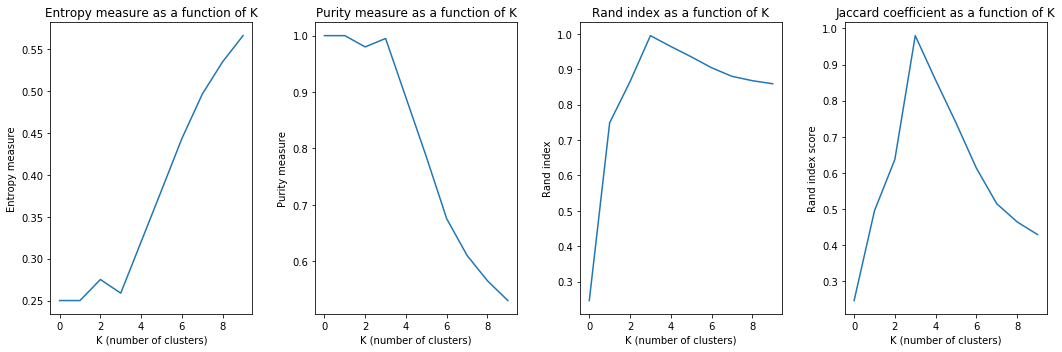

Figure x: Plotting validity measures for K-means clustering with K = 1-10 using the synth1 data set


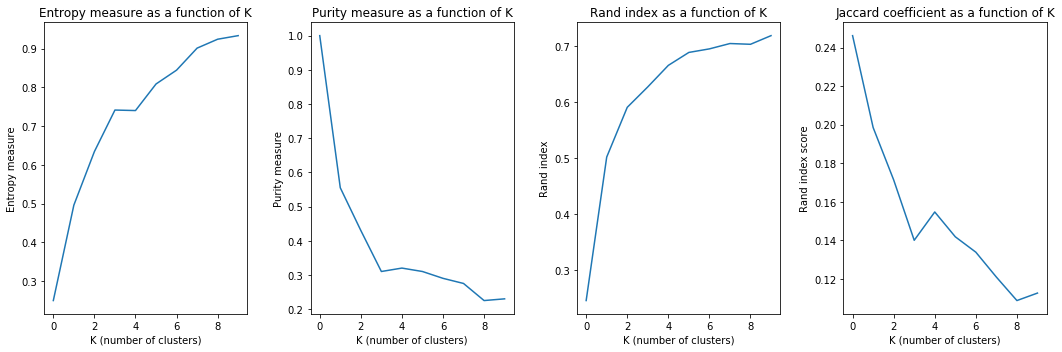

Figure x: Plotting validity measures for K-means clustering with K = 1-10 using the synth2 data set


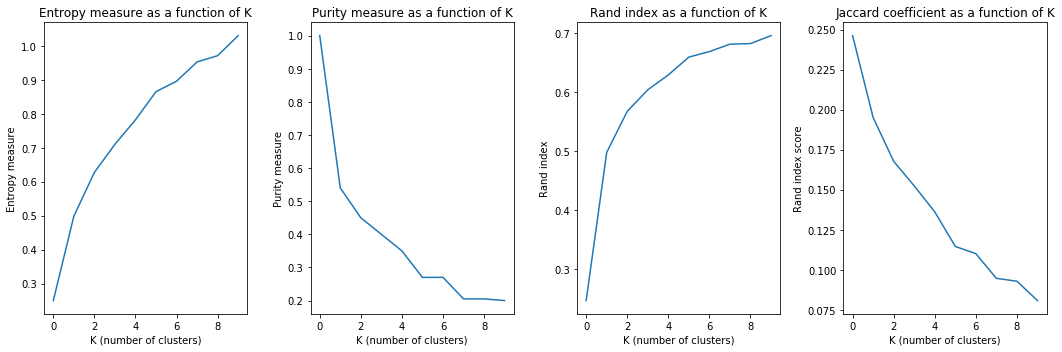

Figure x: Plotting validity measures for K-means clustering with K = 1-10 using the synth3 data set


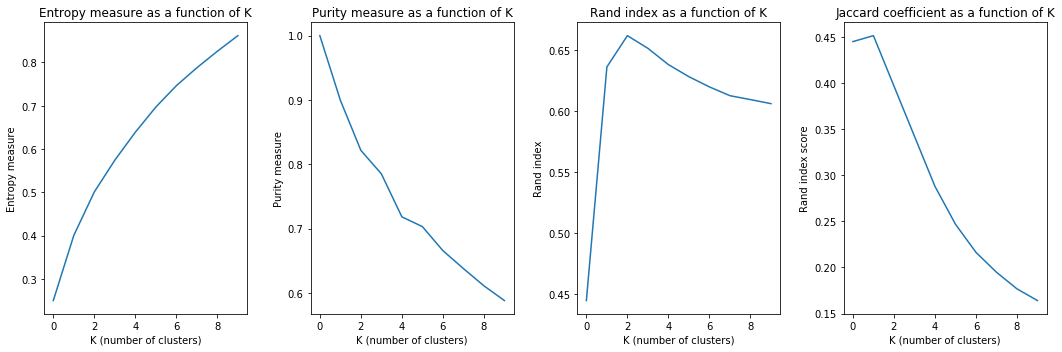

Figure x: Plotting validity measures for K-means clustering with K = 1-10 using the synth4 data set


In [40]:
from Toolbox.clusterVal import clusterVal
import numpy as np

for i in range(1, 5):    
    # Load synth data set
    synth_data = loadmat("Data/synth{}.mat".format(i))  
    validity_scores = []
    
    # Perform k-means clustering for K = 1, ..., 10 clusters
    for j in range(1, 11):
        synth_cluster = KMeans(n_clusters=j).fit(synth_data['X'])
        
        # Compute Entropy, Purity, Rand and Jaccard
        validity_scores.append(np.asarray(clusterVal(synth_cluster.labels_, synth_data['y'])))
        
    # Convert validity scores list to numpy array
    validity_scores = np.asarray(validity_scores)
    
    # Plot validity scores
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4,figsize=(15,5))
    
    # Plot entropy measure
    ax1.plot(validity_scores[:,0])
    ax1.set_title("Entropy measure as a function of K")
    ax1.set_ylabel("Entropy measure")
    ax1.set_xlabel("K (number of clusters)")
    
    # Plot purity measure
    ax2.plot(validity_scores[:,1])
    ax2.set_title("Purity measure as a function of K")
    ax2.set_ylabel("Purity measure")
    ax2.set_xlabel("K (number of clusters)")
    
    # Plot Rand index
    ax3.plot(validity_scores[:,2])
    ax3.set_title("Rand index as a function of K")
    ax3.set_ylabel("Rand index")
    ax3.set_xlabel("K (number of clusters)")
    
    # Plot Jaccard coefficient
    ax4.plot(validity_scores[:,3])
    ax4.set_title("Jaccard coefficient as a function of K")
    ax4.set_ylabel("Rand index score")
    ax4.set_xlabel("K (number of clusters)")
    
    fig.tight_layout()
    plt.show()
    
    print("Figure x: Plotting validity measures for K-means clustering with K = 1-10 using the synth{} data set".format(i))

> 4.1.2b (1 point) How can the cluster validity measures be used to select the best number of clusters?
What happens when more than four clusters are used to model the data?

<b>4.1.2b) dit is een notitie, nog niet het antwoord!</b>

- Low entropy is good (less mistakes)
- Purity: clusters contain only one class (high is better)
- Rand: ?
- Jaccard coefficient: higher is better --> more similarity with true class

*k*-means clustering has many different applications, one of which is data compression. A data set can be compressed by performing *k*-means clustering and then representing each data object by its cluster center. Thus, the only data that need to be stored are the *K* cluster centers and the *N* cluster indices.

> 4.1.3a (1 point) We will consider a subset of the wild faces data described in berg2005[1]. Load the wildfaces data, *Data/wildfaces* using the *loadmat* function. Each data object is a $40 \times 40 \times 3 = 4800$ dimensional vector, corresponding to a 3-color $40 \times 40$ pixels image. Compute a *k*-means clustering of the data with *K = 10* clusters. Plot a few (>3) random images from the data set as well as their corresponding cluster centroids to see how they are represented.
+ You can plot the `k`'th image from array `X` by the command `imshow(np.reshape(X[k,:],(3,40,40)).T)`, which reshapes an image vector to a 3-dimensional array and plots it. You can plot the cluster centroids in a similar manner.


> 4.1.3b (1 point) How well is the data represented by the cluster centroids? Are you able to recognize the faces in the compressed representation? What happens if you increase or decrease the number of clusters?

**Answer**

-----


-----



> 4.1.4a (1 point) Repeat the exercise with the digits data set. Load the digits data set from Data/digits. Each data object is a $16 \times 16 = 256$ dimensional vector, corresponding to a gray scale $16 \times 16$ pixels image.
+ You can change the color map to black-on-white gray-scale by adding the parameter `cmap=cm.binary` to the function `imshow()`.

> 4.1.4b (1 point) Why does running *k*-means with *K = 10* not give you 10 clusters corresponding to the 10 digits *0..9*? How many clusters do you need to visually represent the 10 different digits? Are there any digits that the clustering algorithm seems to confuse more than others and can you explain why?

**Answer**

---

---

## 4.2 Hierarchical Clustering

In this part of the exercie we will consider hierarchical clustering based on the functions from the package `scipy.cluster.hierarchy`. The function `linkage()` forms a sample to sample distance matrix according to a given distance metric, and creates the linkages between data points forming the hierarchical cluster tree. The function `dendrogram()` creates a plot of the generated tree. The function `fcluster()` extracts the cluster from a linkage matrix w.r.t. a given criterion. Read the online documentation and inspect what distance metrics and linkage functions are implemented.

> 4.2.1a (1 point) Load the data set from *Data/synth1*. Cluster the data using hierarchical clustering with single linkage using the Euclidean distance measure. Cluster the data into 4 clusters by cutting off the dendrogram at the right threshold. Plot a dendrogram and a scatter plot of the clusters.
+ The function `linkage()` computes the hierarchical clustering, resulting in a matrix representing the hierarchy of clusterings. Read the online documentation to learn how to use it.
+ You can e.g. type `Z = linkage(X, method='single', metric='euclidean')` to use single linkage with the Euclidean distance measure.
+ To compute a clustering, you can use the function `fcluster()`. For example, type `cls = fcluster(Z, criterion='maxclust', t=4)` to get a maximum of 4 clusters. 
+ To plot a dendrogram, you can use the *dendrogram()* function
+ Again, you can use the function *clusterplot()* to plot a scatter plot of the clustering.

> 4.2.1b (1 point) Change the linkage methods (single, complete, average) and explain how this changes the dendrogram.
Then plot a dendrogram and a scatterplot of the clusters for the *synth2*, *synth3*, and *synth4* data sets..

**Answer**

----


----

## References
1. Tamara L Berg, Alexander C Berg, Jaety Edwards, and DA Forsyth. Who's in the
picture. *Advances in Neural Information Processing Systems*, 17:137-144, 2005.